In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import kagglehub

In [ ]:
path = kagglehub.dataset_download("vinayjose/glioma-grading-clinical-and-mutation-features")

In [ ]:
data = pd.read_csv(path + "/TCGA_InfoWithGrade.csv")
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')

In [ ]:
# Removing Non Important features
data = data.drop(columns = ["Race", 'MUC16', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'])
data.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,PIK3CA
0,0,0,51.30,1,0,0,0,0,0,1
1,0,0,38.72,1,0,0,0,0,1,0
2,0,0,35.17,1,1,1,0,0,0,0
3,0,1,32.78,1,1,1,0,0,0,0
4,0,0,31.51,1,1,1,0,0,0,0


In [ ]:
X = data.drop(columns = ["Grade"], axis=1)
y = data["Grade"]

In [ ]:
X = X.values
y = y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class gloima_stages(nn.Module):
     def __init__(self, n_features = 9, hidden1 = 100, hidden2 = 50, hidden3 = 30, output = 2):
          super().__init__()
          self.fc1 = nn.Linear(n_features, hidden1)
          self.fc2 = nn.Linear(hidden1,hidden2)
          self.fc3 = nn.Linear(hidden2,hidden3)
          self.out = nn.Linear(hidden3, output)
     def forward(self, X):
          X = f.relu(self.fc1(X))
          X = f.relu(self.fc2(X))
          X = f.relu(self.fc3(X))
          X = self.out(X)
          return X

In [ ]:
torch.manual_seed(369)
model = gloima_stages()

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
epoch = 999
losses = []
model.train()
for i in range (epoch):
    y_predict = model(X_train)
    loss = criterion(y_predict, y_train)
    losses.append(loss.detach().numpy())

    if i % 20 == 0:
        print(f" the Epoch: {i} has Loss of: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

 the Epoch: 0 has Loss of: 0.29896122217178345
 the Epoch: 20 has Loss of: 0.2861039638519287
 the Epoch: 40 has Loss of: 0.28974583745002747
 the Epoch: 60 has Loss of: 0.28421396017074585
 the Epoch: 80 has Loss of: 0.28396204113960266
 the Epoch: 100 has Loss of: 0.2921087145805359
 the Epoch: 120 has Loss of: 0.2830003499984741
 the Epoch: 140 has Loss of: 0.2823735475540161
 the Epoch: 160 has Loss of: 0.28796225786209106
 the Epoch: 180 has Loss of: 0.2830123007297516
 the Epoch: 200 has Loss of: 0.28260329365730286
 the Epoch: 220 has Loss of: 0.2898310720920563
 the Epoch: 240 has Loss of: 0.28189459443092346
 the Epoch: 260 has Loss of: 0.28057950735092163
 the Epoch: 280 has Loss of: 0.2864164412021637
 the Epoch: 300 has Loss of: 0.28590184450149536
 the Epoch: 320 has Loss of: 0.28130286931991577
 the Epoch: 340 has Loss of: 0.2793525159358978
 the Epoch: 360 has Loss of: 0.2850319743156433
 the Epoch: 380 has Loss of: 0.2830533981323242
 the Epoch: 400 has Loss of: 0.28027

In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    outputs = model(X_train)
    predicted = torch.argmax(outputs, dim=1)

accuracy = accuracy_score(y_train, predicted)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.8733233979135618


Text(0.5, 0, 'EPOCHS')

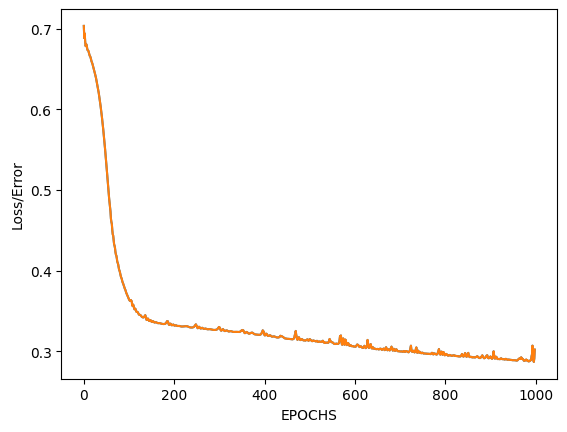

In [ ]:
plt.plot(range(epoch), losses)
plt.ylabel("Loss/Error")
plt.xlabel("EPOCHS")
plt.plot(range(epoch), losses)
plt.ylabel("Loss/Error")
plt.xlabel("EPOCHS")

In [ ]:
with torch.no_grad():
    y_test_pred = model(X_test)
    predicted_classes = torch.argmax(y_test_pred, dim=1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, predicted_classes))

Accuracy: 0.8154761904761905


In [ ]:
index = 777
sample = torch.FloatTensor(X[index].reshape(1, -1))

model.eval()
with torch.no_grad():
    output = model(sample)
    predicted_class = torch.argmax(output, dim=1).item()

print("Actual Grade:", y[index])
print("Predicted Grade:", predicted_class)

Actual Grade: 1
Predicted Grade: 1


In [ ]:
torch.save(model.state_dict(), "glioma_stages.pth")

In [ ]:
abc = gloima_stages()
abc.load_state_dict(torch.load("glioma_stages.pth"))

<All keys matched successfully>

In [ ]:
index = 838
sample = torch.FloatTensor(X[index].reshape(1, -1))

abc.eval()
with torch.no_grad():
    output = abc(sample)
    predicted_class = torch.argmax(output, dim=1).item()

print("Actual Grade:", y[index])
print("Predicted Grade:", predicted_class)

Actual Grade: 1
Predicted Grade: 1
